In [18]:
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from scipy import stats

In [4]:
dataset = sklearn.datasets.fetch_california_housing(as_frame = True)
X: np.ndarray = dataset["data"]
Y: np.ndarray = dataset["target"]

In [16]:
np.max(X['AveOccup'])

1243.3333333333333

In [30]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

<AxesSubplot:xlabel='AveOccup', ylabel='Count'>

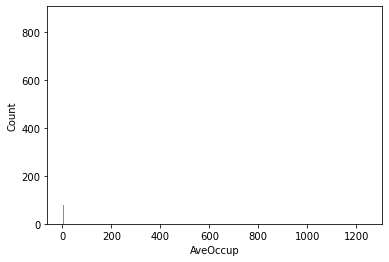

In [13]:
sns.histplot(x =X['AveOccup'])

In [23]:
np.max(X_trim['AveOccup'])

33.95294117647059

In [33]:
Y[(np.abs(stats.zscore(X)) < 2).all(axis=1)]

2        3.521
3        3.413
4        3.422
5        2.697
6        2.992
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 18220, dtype: float64

In [34]:
trim_idxs = (np.abs(stats.zscore(X)) < 2).all(axis=1)
X_trim = X[trim_idxs]
Y_trim = Y[trim_idxs]

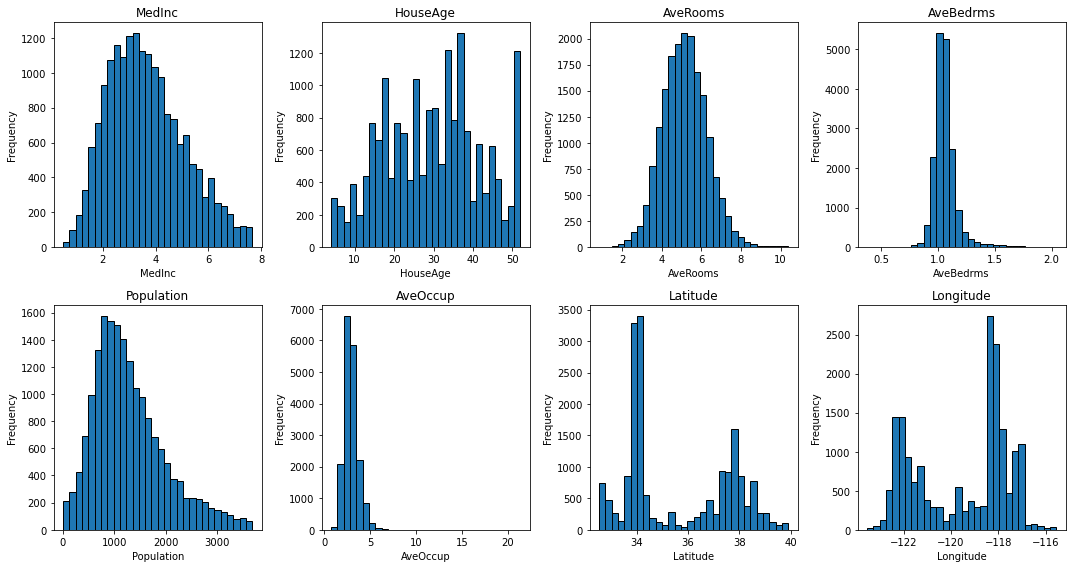

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(X_trim.columns):
    ax = axes[i]
    X_trim[column].plot.hist(ax=ax, bins=30, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

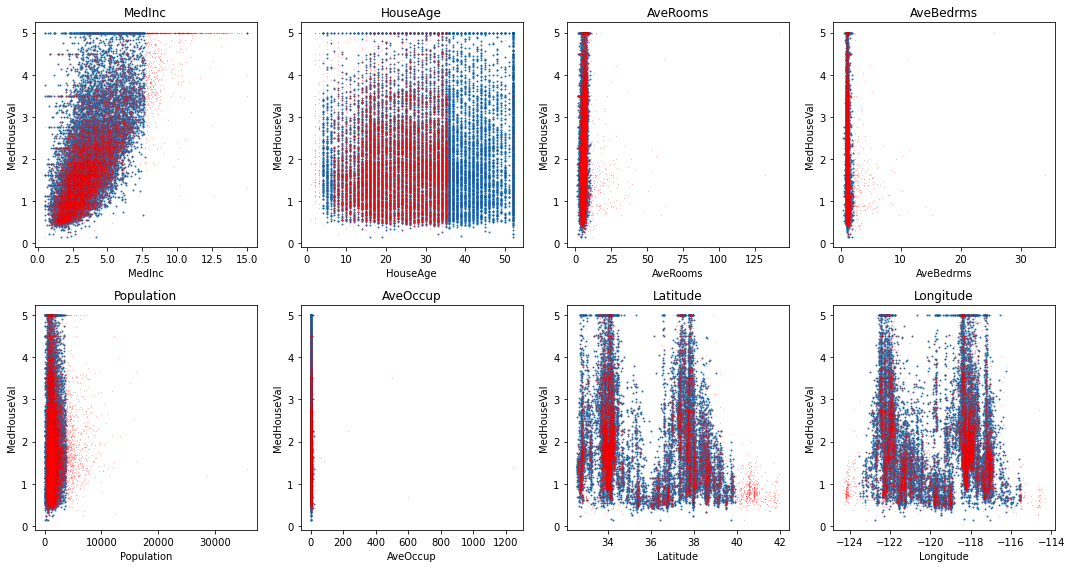

In [41]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(X_trim.columns):
    ax = axes[i]
    ax.scatter(X_trim[column], Y_trim, s = 0.9)
    ax.scatter(X[column], Y, color = 'red', s = 0.01)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('MedHouseVal')

# Adjust layout
plt.tight_layout()
plt.show()